# 1. Exploratory data analysis

The dataset is data from "lending club" which offer peer-to-peer credits. To goal of this analysis is to analyze the data provided and build models for PD using decision tree & random forest models and comparing them to baseline models.

## 1.1 Attribute description

|Attribute|Description|
|---|---|
|loan_amnt             |The listed amount of the loan applied for by the borrower   |
|term                  |The number of payments on the loan. Values are in months and can be either 36 or 60.   |
|int_rate              |Interest Rate on the loan   |
|installment           |The monthly payment owed by the borrower if the loan originates.   |
|emp_title             |The job title supplied by the Borrower when applying for the loan.   |
|emp_length            |Employment length.   |
|home_ownership        |The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER   |
|annual_inc            |The self-reported annual income provided by the borrower during registration   |
|verification_status   |Indicates if income was verified by LC, not verified, or if the income source was verified   |
|issue_d               |The month which the loan was funded   |
|__loan_status__       |__Current status of the loan__   |
|purpose               |A category provided by the borrower for the loan request   |
|title                 |The loan title provided by the borrower   |
|dti                   |A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower's self-reported monthly income   |
|earliest_cr_line      |The month the borrower’s earliest reported credit line was opened   |
|open_acc              |The number of open credit lines in the borrower’s credit file   |
|pub_rec               |Number of derogatory public records   |
|revol_bal             |Total credit revolving balance   |
|revol_util            |Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit   |
|total_acc             |The total number of credit lines currently in the borrower’s credit file   |
|initial_list_status   |The initial listing status of the loan. Possible values are – W, F   |
|application_type      |Indicates whether the loan is an individual application or a joint application with two co-borrowers   |
|mort_acc              |Number of mortgage accounts   |
|pub_rec_bankruptcies  |Number of public record bankruptcies   |
|address               |The address provided by the borrower in the loan application  |

Can be generally be grouped in different categories: 
* __Loan related__
* __Personal - Employment__
* __Personal - Assets__
* __Personal - Liabilities__
* __Personal - Other__


## 1.2 Dataset characteristics

In [2]:
# Library imports
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.ticker as ticker
import matplotlib.colors
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import seaborn as sns
import scipy
from pathlib import Path
__path = Path().absolute()
__rawdata_folder_path = __path / "data"


In [17]:
# Definition of custom UZH color scheme(s)
uzh_colors_full_not_colorsorted = [
    [0.0, 0.156862745098, 0.647058823529, 1],
    [0.639215686, 0.67843137254902, 0.717647058823529, 1],
    [0.862745098039216, 0.376470588, 0.152941176470588, 1],
    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 1],
    [0.164705882352941, 0.498039215686275, 0.384313725490196, 1],
    [0.568627450980392, 0.764705882352941, 0.290196078431373, 1],
    [0.996078431372549, 0.870588235294118, 0, 1],
    [0.0, 0.156862745098, 0.647058823529, 0.8],
    [0.639215686, 0.67843137254902, 0.717647058823529, 0.8],
    [0.862745098039216, 0.376470588, 0.152941176470588, 0.8],
    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.8],
    [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.8],
    [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.8],
    [0.996078431372549, 0.870588235294118, 0, 0.8],
    [0.0, 0.156862745098, 0.647058823529, 0.6],
    [0.639215686, 0.67843137254902, 0.717647058823529, 0.6],
    [0.862745098039216, 0.376470588, 0.152941176470588, 0.6],
    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.6],
    [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.6],
    [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.6],
    [0.996078431372549, 0.870588235294118, 0, 0.6],
    [0.0, 0.156862745098, 0.647058823529, 0.4],
    [0.639215686, 0.67843137254902, 0.717647058823529, 0.4],
    [0.862745098039216, 0.376470588, 0.152941176470588, 0.4],
    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.4],
    [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.4],
    [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.4],
    [0.996078431372549, 0.870588235294118, 0, 0.4],
    [0.0, 0.156862745098, 0.647058823529, 0.2],
    [0.639215686, 0.67843137254902, 0.717647058823529, 0.2],
    [0.862745098039216, 0.376470588, 0.152941176470588, 0.2],
    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.2],
    [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.2],
    [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.2],
    [0.996078431372549, 0.870588235294118, 0, 0.2]]

uzh_colors_full_colorsorted = [
    [0.0, 0.156862745098, 0.647058823529, 1],
    [0.0, 0.156862745098, 0.647058823529, 0.8],
    [0.0, 0.156862745098, 0.647058823529, 0.6],
    [0.0, 0.156862745098, 0.647058823529, 0.4],
    [0.0, 0.156862745098, 0.647058823529, 0.2],

    [0.639215686, 0.67843137254902, 0.717647058823529, 1],
    [0.639215686, 0.67843137254902, 0.717647058823529, 0.8],
    [0.639215686, 0.67843137254902, 0.717647058823529, 0.6],
    [0.639215686, 0.67843137254902, 0.717647058823529, 0.4],
    [0.639215686, 0.67843137254902, 0.717647058823529, 0.2],

    [0.862745098039216, 0.376470588, 0.152941176470588, 1],
    [0.862745098039216, 0.376470588, 0.152941176470588, 0.8],
    [0.862745098039216, 0.376470588, 0.152941176470588, 0.6],
    [0.862745098039216, 0.376470588, 0.152941176470588, 0.4],
    [0.862745098039216, 0.376470588, 0.152941176470588, 0.2],

    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 1],
    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.8],
    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.6],
    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.4],
    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 0.2],

    [0.164705882352941, 0.498039215686275, 0.384313725490196, 1],
    [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.8],
    [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.6],
    [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.4],
    [0.164705882352941, 0.498039215686275, 0.384313725490196, 0.2],

    [0.568627450980392, 0.764705882352941, 0.290196078431373, 1],
    [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.8],
    [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.6],
    [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.4],
    [0.568627450980392, 0.764705882352941, 0.290196078431373, 0.2],


    [0.996078431372549, 0.870588235294118, 0, 1],
    [0.996078431372549, 0.870588235294118, 0, 0.8],
    [0.996078431372549, 0.870588235294118, 0, 0.6],
    [0.996078431372549, 0.870588235294118, 0, 0.4],
    [0.996078431372549, 0.870588235294118, 0, 0.2]]

uzh_colors_no_shades = [
    [0.0, 0.156862745098, 0.647058823529, 1],
    [0.639215686, 0.67843137254902, 0.717647058823529, 1],
    [0.862745098039216, 0.376470588, 0.152941176470588, 1],
    [0.0431372549019608, 0.509803921568627, 0.627450980392157, 1],
    [0.164705882352941, 0.498039215686275, 0.384313725490196, 1],
    [0.568627450980392, 0.764705882352941, 0.290196078431373, 1],
    [0.996078431372549, 0.870588235294118, 0, 1]]

uzh_colors_blue_orange = [
    [0.639215686, 0.67843137254902, 0.717647058823529, 1],
    [0.639215686, 0.67843137254902, 0.717647058823529, 0.8],

    [0.0, 0.156862745098, 0.647058823529, 1],
    [0.0, 0.156862745098, 0.647058823529, 0.8],

    [0.862745098039216, 0.376470588, 0.152941176470588, 1],
    [0.862745098039216, 0.376470588, 0.152941176470588, 0.8]]


# UZH colormap generation
uzh_colors_full_not_colorsorted_colormap = ListedColormap(
    uzh_colors_full_not_colorsorted)
uzh_colors_full_colorsorted_colormap = ListedColormap(
    uzh_colors_full_colorsorted)
uzh_colors_no_shades_colormap = ListedColormap(uzh_colors_no_shades)
uzh_colors_blue_orange_colormap = ListedColormap(uzh_colors_blue_orange)


def reduced_colormap(colormap, number_of_colors_needed):

    reduced_cm = colormap(range(0, number_of_colors_needed))
    return(ListedColormap(reduced_cm))


In [291]:
# Import (raw) dataset

def source_rawdata(rawdata_folder_path):

    dataset_pd = pd.DataFrame()

    for data_file in os.listdir(rawdata_folder_path):
        __filepath = rawdata_folder_path / data_file
        # Manually fixed the entry of line 10153 in file 2 as it contained additional /" characters causing import issues
        dataset_pd = pd.concat([dataset_pd, pd.read_table(
            __filepath, quotechar='"', verbose=False)])

    return dataset_pd


imported_dataset_df = source_rawdata(__rawdata_folder_path)
# Reset index to remove duplicate indices resulting from the import of these different files
imported_dataset_df = imported_dataset_df.reset_index(drop=True)
# Prohibit duplicate indices for this dataframe in the future
imported_dataset_df.flags.allows_duplicate_labels = False

In [5]:
# Check for duplicates
print('Number of duplicated rows: ',
      imported_dataset_df[imported_dataset_df.duplicated()].shape[0])


Number of duplicated rows:  0


In [10]:
# Get number of items & attributes in dataset
print('Number of items in raw dataset: ', imported_dataset_df.shape[0])
print('Number of attributes in raw dataset: ', imported_dataset_df.shape[1])


Number of items in raw dataset:  396030
Number of attributes in raw dataset:  25


### 1.2.1 Overall dataset

* Dataset does not contain duplicates
* Dataset contains 396030 entries with 25 attributes each

Attributes with missing values
                      count
emp_title             22927
emp_length            18301
title                  1755
revol_util              276
mort_acc              37795
pub_rec_bankruptcies    535


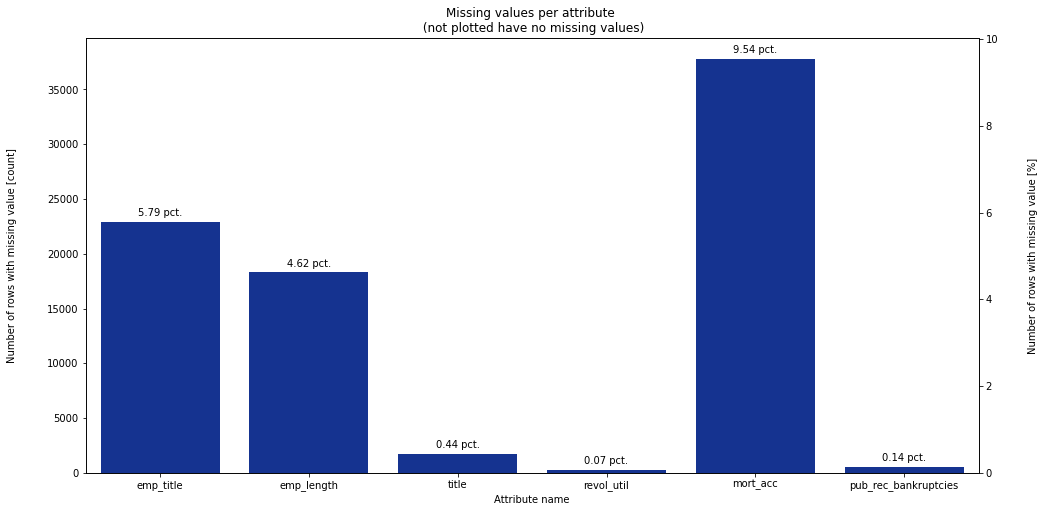

In [257]:
# Identification of missing values
null_df = imported_dataset_df.apply(
    lambda x: sum(x.isnull())).to_frame(name='count')
null_df = null_df[null_df['count'] != 0]
print('Attributes with missing values')
print(null_df)

plt_title = 'Missing values per attribute \n (not plotted have no missing values)'
plt_y_left_label = 'Number of rows with missing value [%]'
plt_y_right_label = 'Number of rows with missing value [count]'
plt_x_label = 'Attribute name'
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=null_df.index, y=null_df['count'], color=uzh_colors_blue_orange[2])
ax.lines[0].set_color(uzh_colors_blue_orange[0])
plt.title(plt_title)
plt.xlabel(plt_x_label)

# Make twin axis
ax2 = ax.twinx()

# Define y-axis positions
ax.yaxis.set_label_position('left')
ax2.yaxis.set_label_position('right')

# Add percentage values
ncount = len(imported_dataset_df)
ax2 = sns.barplot(x=null_df.index, y=(
    null_df['count']/ncount)*100, color=uzh_colors_blue_orange[2])

# Set y-axis labels
ax2.set_ylabel(plt_y_left_label, labelpad=30)
ax.set_ylabel(plt_y_right_label, labelpad=30)

# Add percentage value on bars
for i in ax2.containers:
    ax2.bar_label(i, fmt='%.2f pct.', padding=4)


Text(140.0, 0.5, 'Item index')

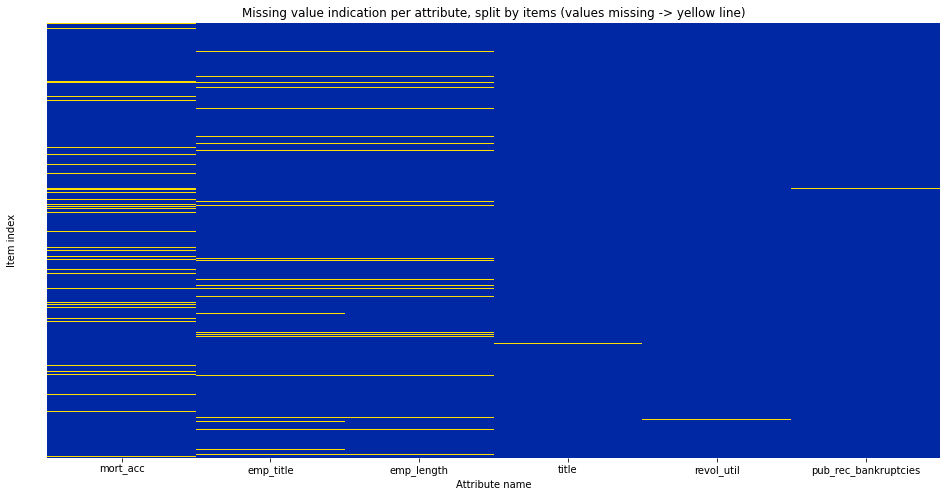

In [281]:
# Missing value item heatmap
plt_title = 'Missing value indication per attribute, split by items (values missing -> yellow line)'
plt_y_left_label = 'Item index'
plt_x_label = 'Attribute name'
plt.figure(figsize=(16, 8))
ax = sns.heatmap(imported_dataset_df[['mort_acc', 'emp_title', 'emp_length', 'title', 'revol_util', 'pub_rec_bankruptcies']].isnull(), yticklabels=False, cbar=False, cmap= uzh_colors_no_shades_colormap)
plt.title(plt_title)
plt.xlabel(plt_x_label)
ax.set_ylabel(plt_y_left_label, labelpad=30)

### 1.2.2 Missing values

* There are 6 attributes with missing values: emp_title, emp_length, title, revol_util, mort_acc, pub_rec_bankruptcies

In [132]:
# Analysis of missing value attribute composition
for i in null_df.index:
    print('Attribute: ' + i)
    print(imported_dataset_df[i].unique())
    print('There are ' +
          str(len(imported_dataset_df[i].unique())) + ' different values')
    print('\n')


Attribute: emp_title
['Marketing' 'Credit analyst ' 'Statistician' ...
 "Michael's Arts & Crafts" 'licensed bankere' 'Gracon Services, Inc']
There are 173106 different values


Attribute: emp_length
['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]
There are 12 different values


Attribute: title
['Vacation' 'Debt consolidation' 'Credit card refinancing' ...
 'Credit buster ' 'Loanforpayoff' 'Toxic Debt Payoff']
There are 48818 different values


Attribute: revol_util
[ 41.8   53.3   92.2  ...  56.26 111.4  128.1 ]
There are 1227 different values


Attribute: mort_acc
[ 0.  3.  1.  4.  2.  6.  5. nan 10.  7. 12. 11.  8.  9. 13. 14. 22. 34.
 15. 25. 19. 16. 17. 32. 18. 24. 21. 20. 31. 28. 30. 23. 26. 27.]
There are 34 different values


Attribute: pub_rec_bankruptcies
[ 0.  1.  2.  3. nan  4.  5.  6.  7.  8.]
There are 10 different values




### 1.2.2 Missing values (cont.)

#### 1.2.2.1 emp_title

There are a lot of different values, that also contain typos or are very specific (e.g. 'Michael's Arts & Crafts'). Therefore, it is assumed that the added model value is minimal. Attribute will be dropped.

#### 1.2.2.2 emp_length

Values range from '<1 year' to '10+ years'. Might be a relevant attribute - higher employment length might indicate more stable job and therefore higher likelihood of a continous income which in turn might be relevant for loan payback.

Therefore, missing value imputation strategy will be considered later on (e.g. mean, median or correlated with other attributes). 

#### 1.2.2.3 title

There are a lot of different values for the loan title, as the title was provided by the borrower it is assumed that there is no particular value in it. Attribute will be dropped.

Examples: 'Dream Wedding for my lil girl', 'Ducks in a Row', 'MyLoan', 'Proven Borrower with Strong Track Record'

#### 1.2.2.4 revol_util

Revolving line utilization rate might be a relevant attribute - higher utilization rate might indicate that borrower "maxes out all credit", i.e. needs all credit capacity to finance his obligations, which in turn might indicate that they don't have enough income to pay their regular obligations.

However, only 0.07% have missing values, so items with missing attribute value can most likely be dropped without major impact on model quality.

#### 1.2.2.5 mort_acc

Might be relevant, as someone with a lot of mortgage accounts might have a lot of other debt obligations and therefore might be more likely to default on the given loan.

Additional analysis will be performed to impute missing values based on home ownership status. Additional considerations might be taken into account based on correlation with other attributes.


#### 1.2.2.6 pub_rec_bankruptcies

Might be relevant, as someone that already defaulted on a loan might be more likely to default again.

Only 0.14% have missing values, so items might be dropped without impacting the model much.



Text(0.5, 0, 'Home ownership status')

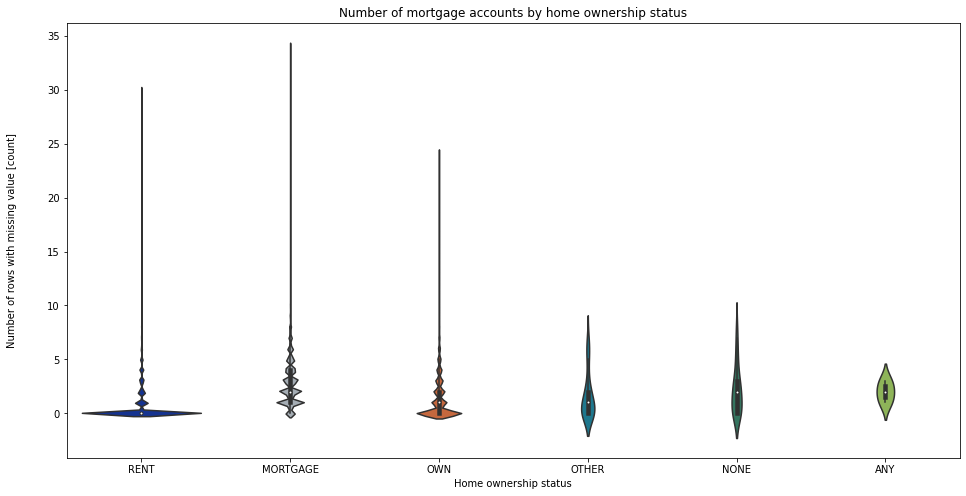

In [194]:
# Violin plot no. mortgage accounts by home ownership status
plt.figure(figsize=(16, 8))
ax = sns.violinplot(x='home_ownership',y='mort_acc',data=imported_dataset_df, palette= uzh_colors_no_shades)

plt_title = 'Number of mortgage accounts by home ownership status'
plt_y_left_label = 'Number of mortgage accounts'
plt_x_label = 'Home ownership status'

ax.set_ylabel(plt_y_right_label, labelpad=30)
plt.title(plt_title)
plt.xlabel(plt_x_label)


In [209]:
# Analysis correlation missing number mortgage accounts and loan status
home_own_mort_acc_compare_df = imported_dataset_df[imported_dataset_df['mort_acc'].isnull()]

grouped_frame = home_own_mort_acc_compare_df.groupby(['home_ownership','loan_status'])['loan_amnt'].count()
print(grouped_frame.head(20))
print('\n')

print('Ratios of charged of loans vs. total loans on missing no. mortgage accounts')
print('Ratio for type = "MORTGAGE"', str(round(grouped_frame[0]/(grouped_frame[0]+grouped_frame[1]),2)) + ' %')
print('Ratio for type = "OWN"', str(round(grouped_frame[5]/(grouped_frame[5]+grouped_frame[6]),2)) + ' %')
print('Ratio for type = "RENT"', str(round(grouped_frame[7]/(grouped_frame[7]+grouped_frame[8]),2)) + ' %')

home_ownership  loan_status
MORTGAGE        Charged Off     2254
                Fully Paid     14388
NONE            Fully Paid         2
OTHER           Charged Off        9
                Fully Paid        69
OWN             Charged Off      459
                Fully Paid      2508
RENT            Charged Off     2828
                Fully Paid     15278
Name: loan_amnt, dtype: int64


Ratios of charged of loans vs. total loans on missing no. mortgage accounts
Ratio for type = "MORTGAGE" 0.14 %
Ratio for type = "OWN" 0.15 %
Ratio for type = "RENT" 0.16 %


#### 1.2.2.5 mort_acc (cont.)

Analysis shows that most renting have 0 mortgages (which is expected), so for renting missing values will be imputed as 0.

For other categories the median of their respective home ownership status will be used to impute missing numbers of mortgage accounts.

### 1.2.3 Dependent variable definition and distribution

'Loan status' is the dependent variable indicating if a loan defaulted ('charged off') or was successfully paid back ('fully paid'). 

The distribution shows that roughly 20% of the loans are defaulted.

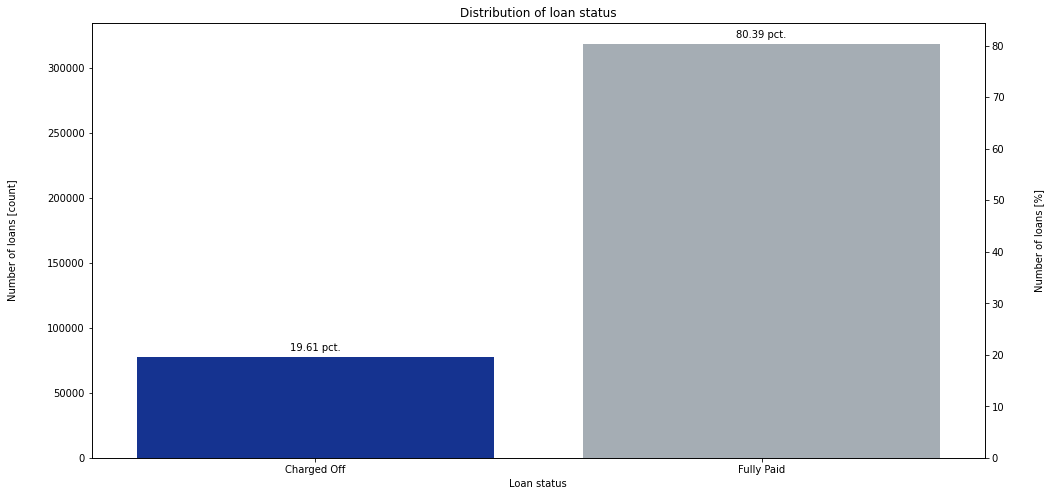

In [245]:
# Plot distribution for loan status
grouped_dep_var_dataframe = imported_dataset_df.groupby(['loan_status']).count()

plt_title = 'Distribution of loan status'
plt_y_left_label = 'Number of loans [%]'
plt_y_right_label = 'Number of loans [count]'
plt_x_label = 'Loan status'
plt.figure(figsize=(16, 8))
ax = sns.barplot(x = grouped_dep_var_dataframe.index, y = grouped_dep_var_dataframe['loan_amnt'], palette = uzh_colors_no_shades)
plt.title(plt_title)
plt.xlabel(plt_x_label)

# Make twin axis
ax2 = ax.twinx()

# Define y-axis positions
ax.yaxis.set_label_position('left')
ax2.yaxis.set_label_position('right')

# Add percentage values
ncount = len(imported_dataset_df)
ax2 = sns.barplot(x=grouped_dep_var_dataframe.index, y=(grouped_dep_var_dataframe['loan_amnt']/ncount)*100, palette = uzh_colors_no_shades)

# Set y-axis labels
ax2.set_ylabel(plt_y_left_label, labelpad=30)
ax.set_ylabel(plt_y_right_label, labelpad=30)

# Add percentage value on bars
for i in ax2.containers:
    ax2.bar_label(i, fmt='%.2f pct.', padding=4)

### 1.2.4 Independent variable correlations



### 1.2.5 Dependent/independent variable correlations

# 2 
## 2.1 Data cleansing and missing value imputation 
## 2.2 Attribute selection selection

### 1.2.2 Missing values (cont. II)

Missing value cleanup strategy will be applied as follows:

* emp_title: Attribute will be dropped 
* emp_length:
* title: Attribute will be dropped  
* revol_util: 
* mort_acc:
* pub_rec_bankcruptcies:

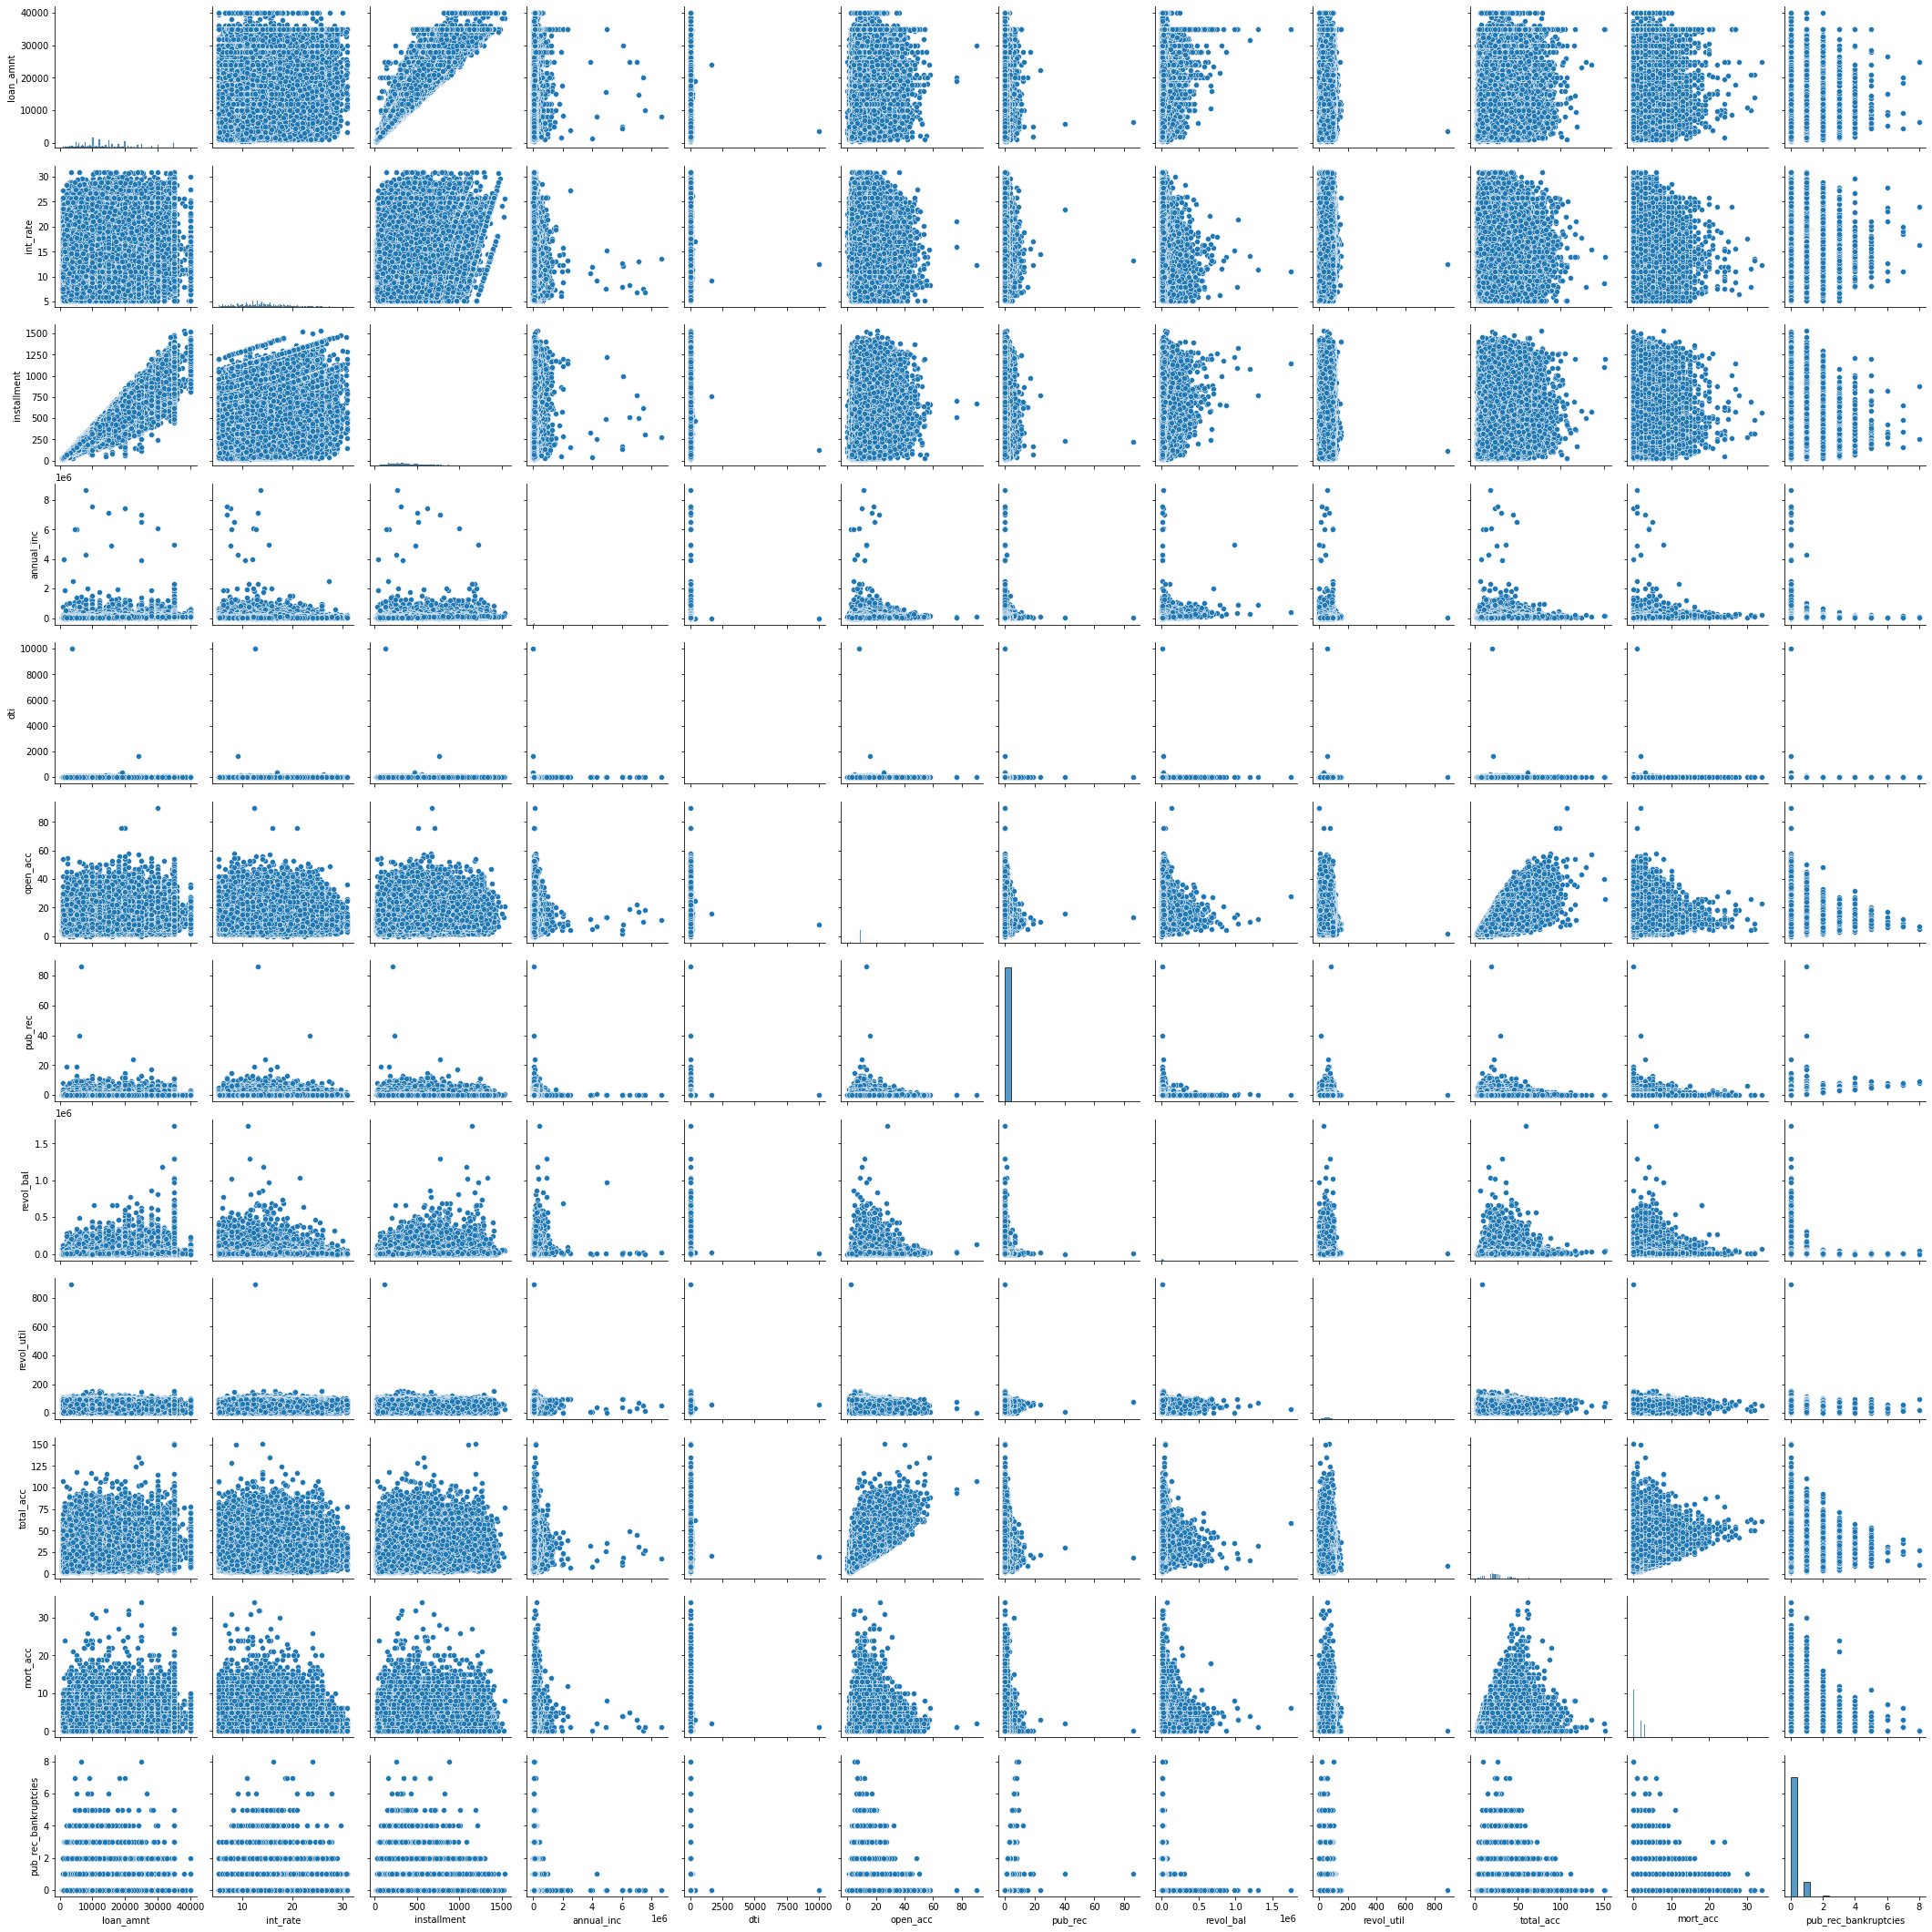

In [292]:
sns.pairplot(imported_dataset_df, palette = uzh_colors_no_shades_colormap, hue = 'loan_status')

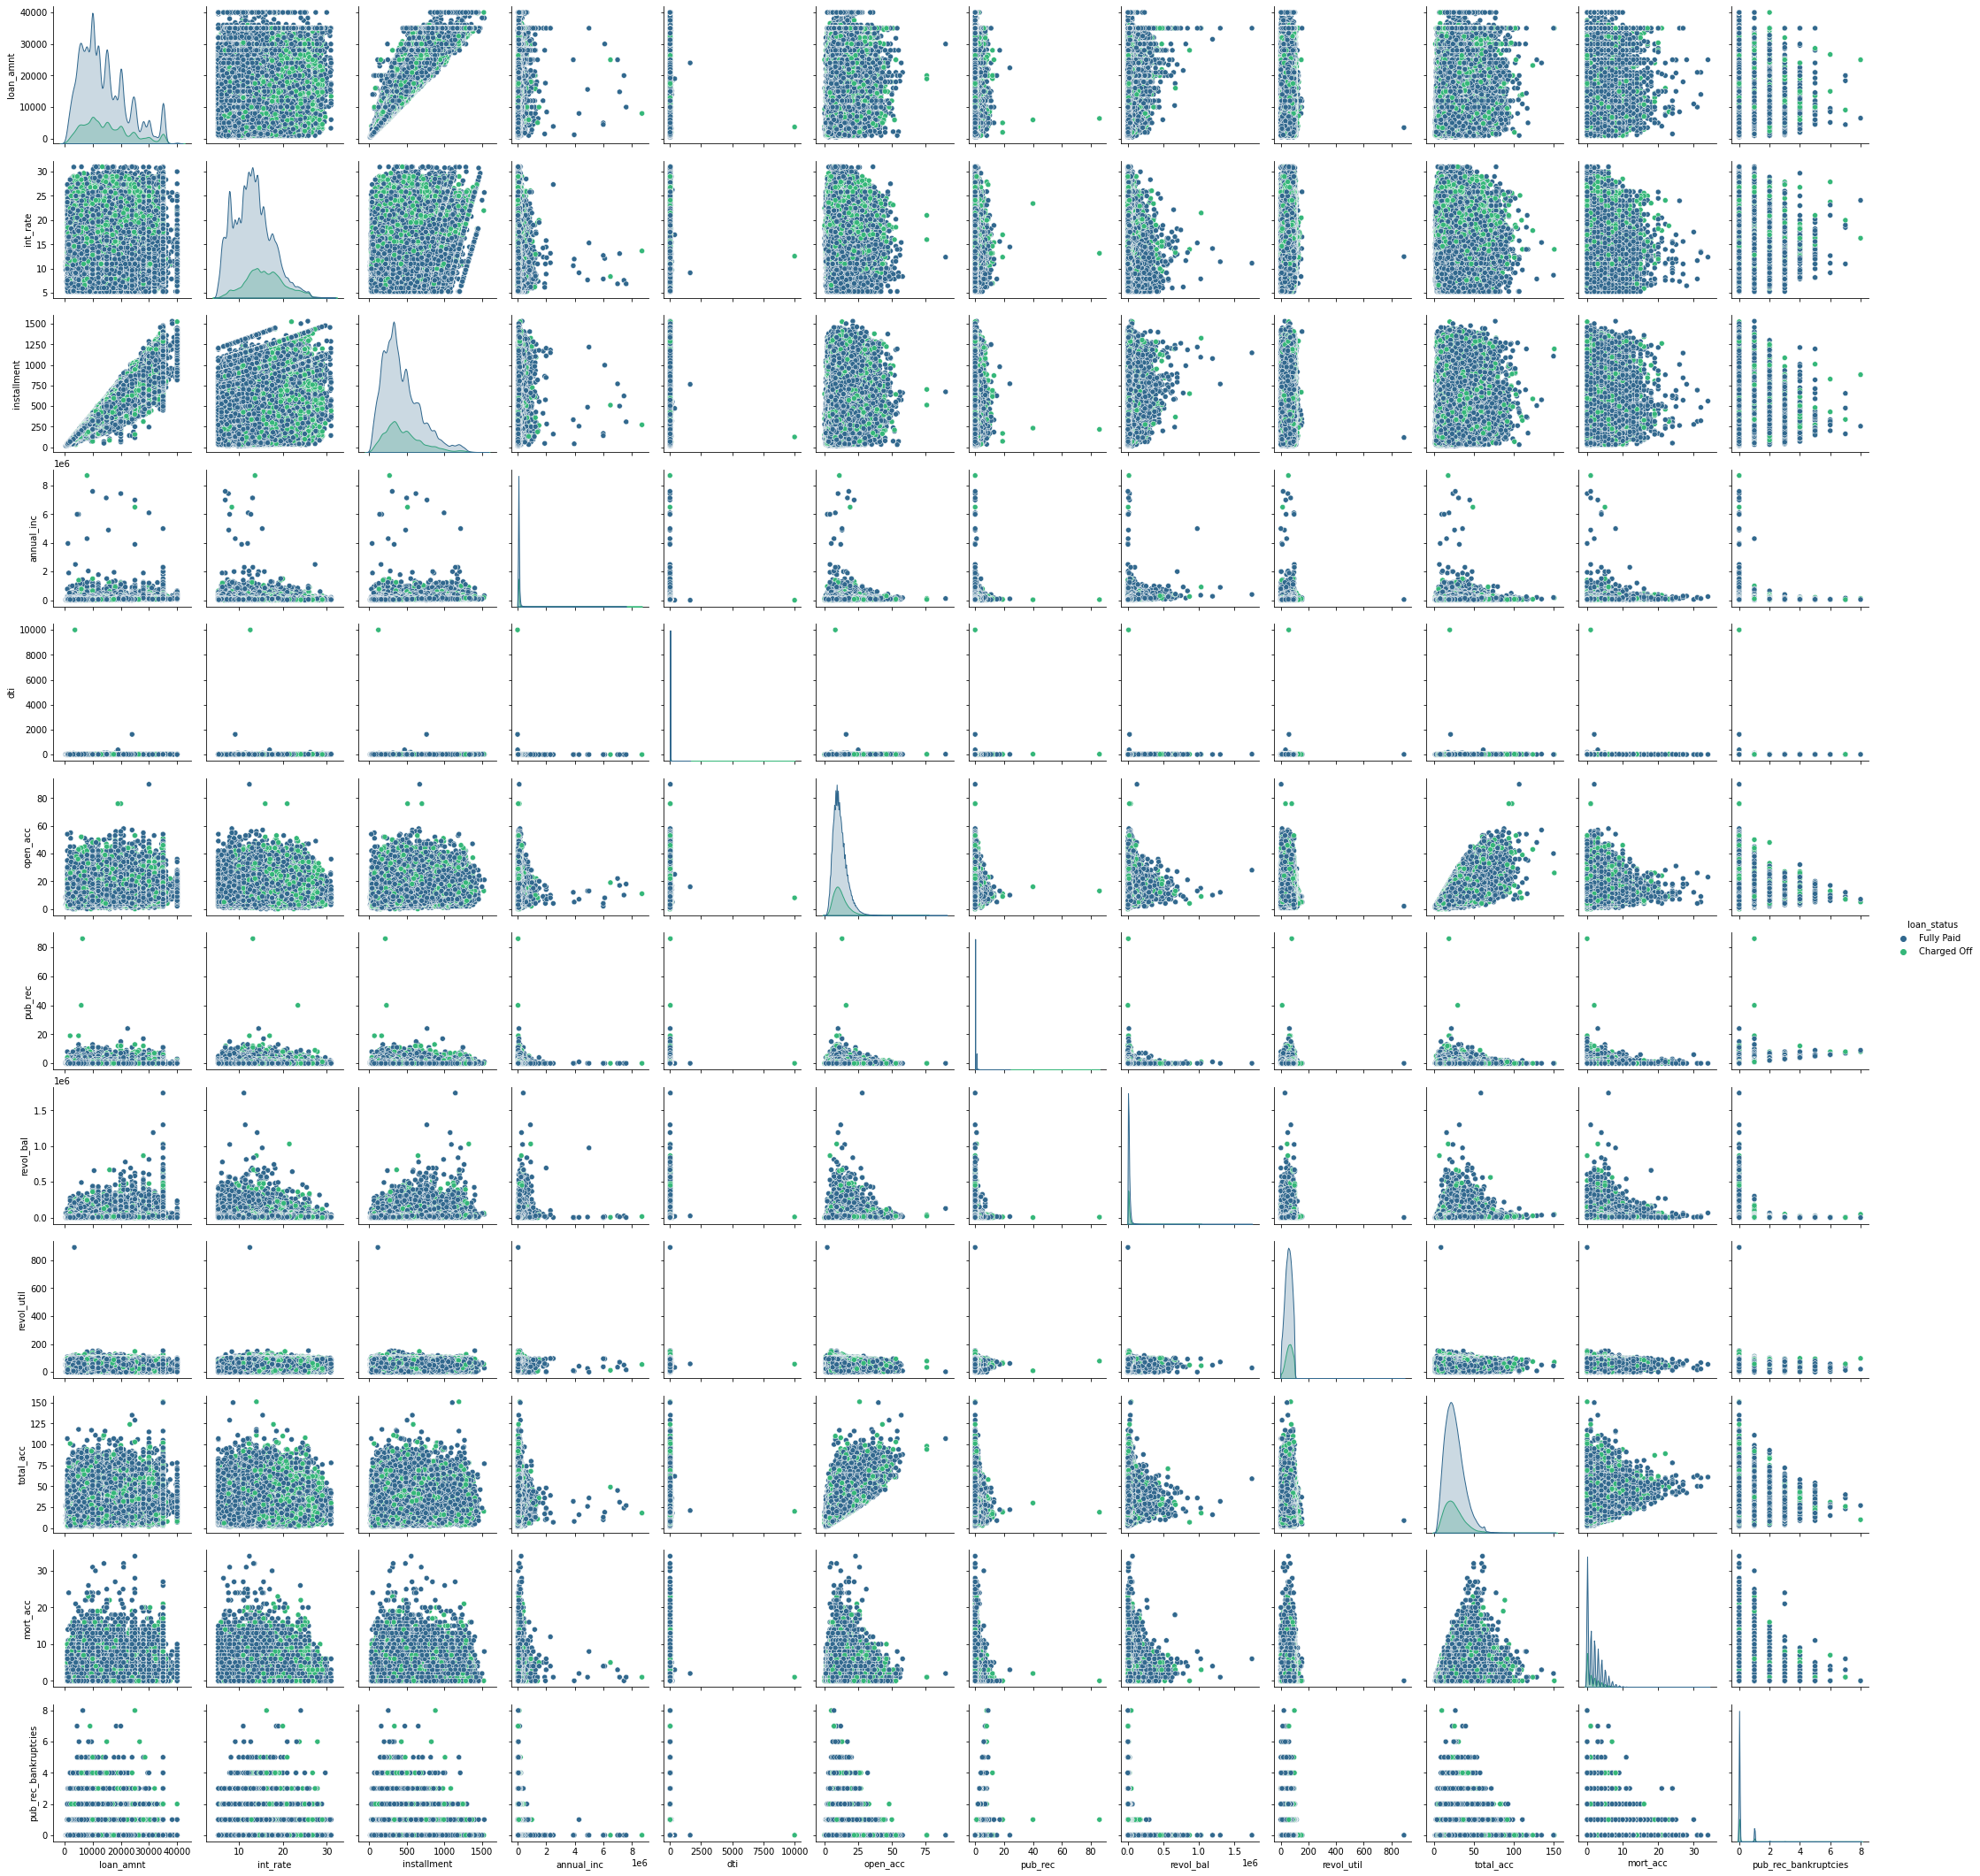

In [296]:
sns.pairplot(imported_dataset_df, palette = 'viridis', hue = 'loan_status')

c:\Users\cronus_win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


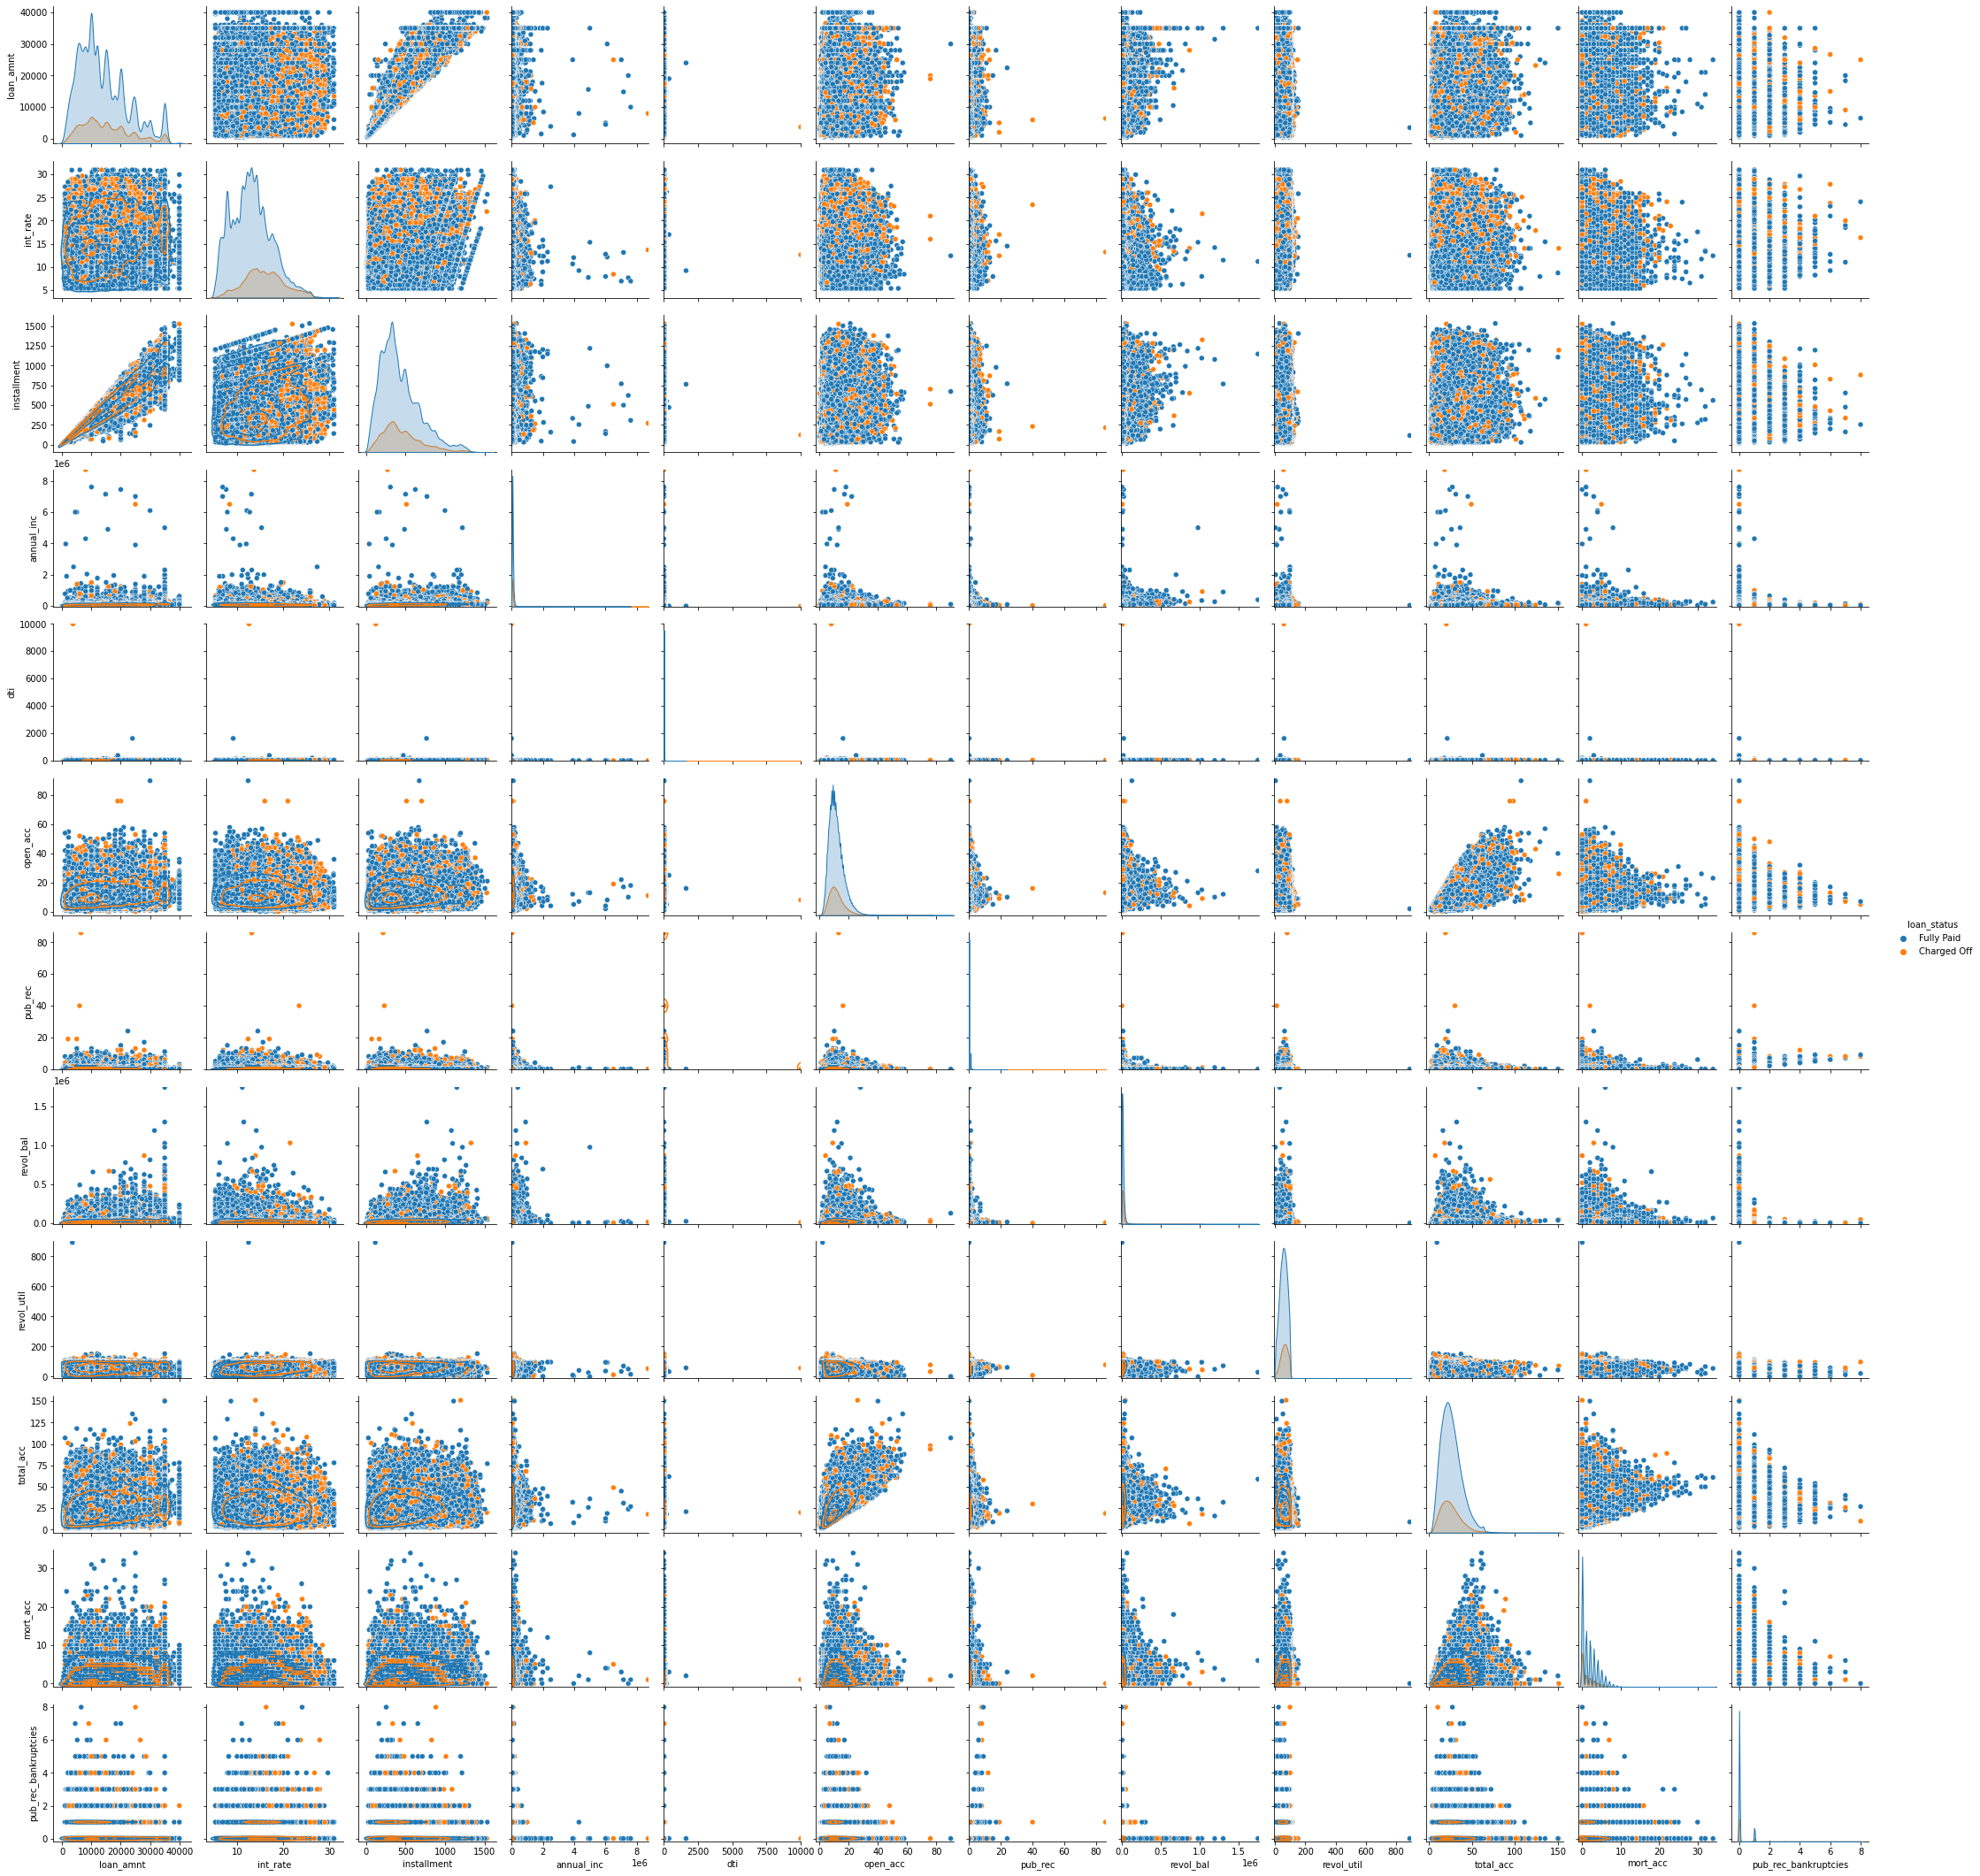

In [297]:
g = sns.pairplot(imported_dataset_df, diag_kind="kde", hue='loan_status')
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [299]:
sns.pairplot(imported_dataset_df, kind="hist")

MemoryError: Unable to allocate 1.66 GiB for an array with shape (31381, 7106) and data type float64

In [ ]:
sns.pairplot(imported_dataset_df, kind="kde")

In [ ]:
sns.pairplot(imported_dataset_df, hue="loan_status", diag_kind="hist")

In [287]:
imported_dataset_df.loc[~imported_dataset_df.index.duplicated(), :]
imported_dataset_df.index.duplicated()

imported_dataset_df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            98994, 98995, 98996, 98997, 98998, 98999, 99000, 99001, 99002,
            99003],
           dtype='int64', length=396030)